In [43]:
library("AzureML")
ws <- workspace()
sample <- download.datasets(ws, "sample.csv") #sample with 1 million entries
sample10 <- download.datasets(ws, "10000sample.csv") #sample with 10000 entries

#Categoric variables
sample10$Semana <- as.factor(sample10$Semana)
sample10$Agencia_ID <- as.factor(sample10$Agencia_ID)
sample10$Canal_ID <- as.factor(sample10$Canal_ID)
sample10$Ruta_SAK <- as.factor(sample10$Ruta_SAK)
sample10$Cliente_ID <- as.factor(sample10$Cliente_ID)
sample10$Producto_ID <- as.factor(sample10$Producto_ID)

sample$Semana <- as.factor(sample$Semana)
sample$Agencia_ID <- as.factor(sample$Agencia_ID)
sample$Canal_ID <- as.factor(sample$Canal_ID)
sample$Ruta_SAK <- as.factor(sample$Ruta_SAK)
sample$Cliente_ID <- as.factor(sample$Cliente_ID)
sample$Producto_ID <- as.factor(sample$Producto_ID)

In [48]:
bimbo <- sample10
bimbo <- bimbo[c('Agencia_ID','Ruta_SAK','Cliente_ID','Producto_ID','Venta_uni_hoy',
                 'Venta_hoy','Dev_uni_proxima','Dev_proxima','Demanda_uni_equil')]

In [49]:
library(cluster)

#Dissimilarity matrix
distmatrix <- daisy(bimbo) #Gower's distance

In [123]:
#clustering
hierarchy <- hclust(distmatrix, method="complete") 
#"ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median" or "centroid" 

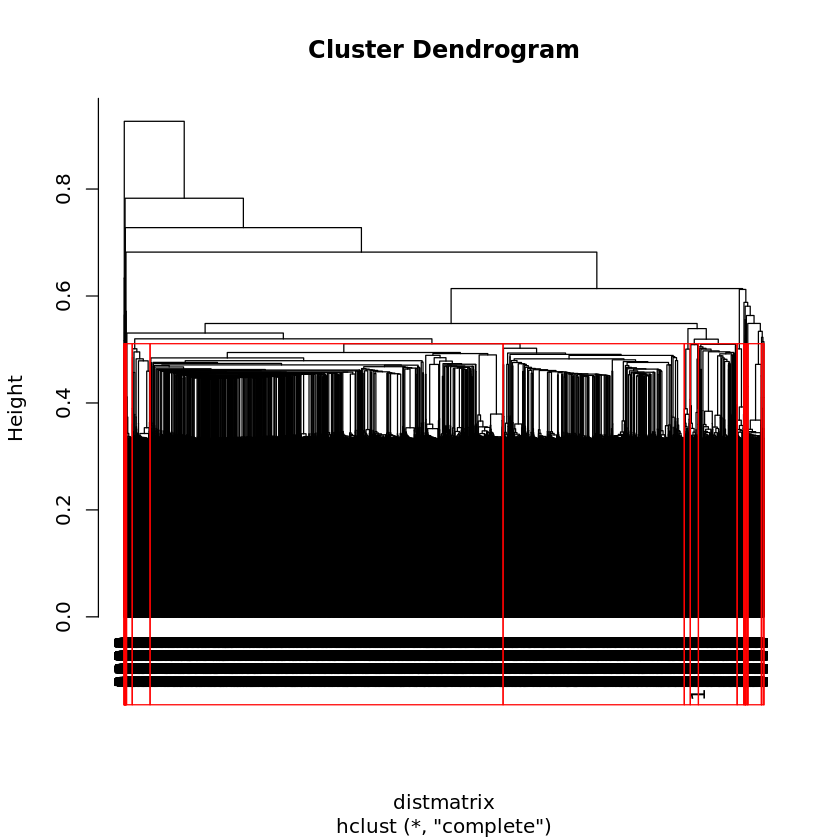

In [131]:
plot(hierarchy, hang = -1)
rect.hclust(hierarchy, k = 32)

In [132]:
#Split hierarchy at k clusters 
k = 100
for (i in 1:k) {
    print(i)
    kclusters <- cutree(hierarchy,i)
    print(table(kclusters)) 
}

[1] 1
kclusters
    1 
10000 
[1] 2
kclusters
   1    2 
9984   16 
[1] 3
kclusters
   1    2    3 
9981   16    3 
[1] 4
kclusters
   1    2    3    4 
9976   16    3    5 
[1] 5
kclusters
   1    2    3    4    5 
9960   16   16    3    5 
[1] 6
kclusters
   1    2    3    4    5    6 
9960   16   12    3    4    5 
[1] 7
kclusters
   1    2    3    4    5    6    7 
9540  420   16   12    3    4    5 
[1] 8
kclusters
   1    2    3    4    5    6    7    8 
9540  104  316   16   12    3    4    5 
[1] 9
kclusters
   1    2    3    4    5    6    7    8    9 
9540  104  316   16   12    3    4    3    2 
[1] 10
kclusters
   1    2    3    4    5    6    7    8    9   10 
9540  104  316   16   12    1    4    3    2    2 
[1] 11
kclusters
   1    2    3    4    5    6    7    8    9   10   11 
9540  104  308   16    8   12    1    4    3    2    2 
[1] 12
kclusters
   1    2    3    4    5    6    7    8    9   10   11   12 
9540  104  280   16    8   12    1    4   28    3    2    2 

In [151]:
#Summary statistics for k clusters
k = 32
kclusters <- cutree(hierarchy,k)
indices <- c(1,2,8)
for (i in indices) {
    elems <- sample10[kclusters == i,] #elems for cluster i
    print(paste0("******************* Cluster: ", i, " *******************"))
    print(summary(elems))
    
    demanda <- elems[,'Demanda_uni_equil']
    print(paste0("standard deviation for Demanda: ", sd(demanda)))
}

[1] "******************* Cluster: 1 *******************"
 Semana    Agencia_ID      Canal_ID       Ruta_SAK      Cliente_ID  
 3:814   2653   :  66   1      :4974   1203   :  42   322760 :   3  
 4:805   1351   :  59   4      : 340   1201   :  36   10516  :   2  
 5:782   1121   :  57   11     :  92   2102   :  35   22799  :   2  
 6:766   4037   :  56   7      :  55   1206   :  33   34669  :   2  
 7:798   1312   :  54   2      :  27   1104   :  31   43503  :   2  
 8:791   2015   :  51   6      :  22   1001   :  30   80433  :   2  
 9:759   (Other):5172   (Other):   5   (Other):5308   (Other):5502  
  Producto_ID   Venta_uni_hoy     Venta_hoy       Dev_uni_proxima  
 1242   : 235   Min.   : 0.00   Min.   :   0.00   Min.   :0.00000  
 1284   : 235   1st Qu.: 2.00   1st Qu.:  16.67   1st Qu.:0.00000  
 2233   : 232   Median : 3.00   Median :  29.64   Median :0.00000  
 1146   : 218   Mean   : 5.59   Mean   :  49.03   Mean   :0.02611  
 1109   : 173   3rd Qu.: 6.00   3rd Qu.:  54.00   3

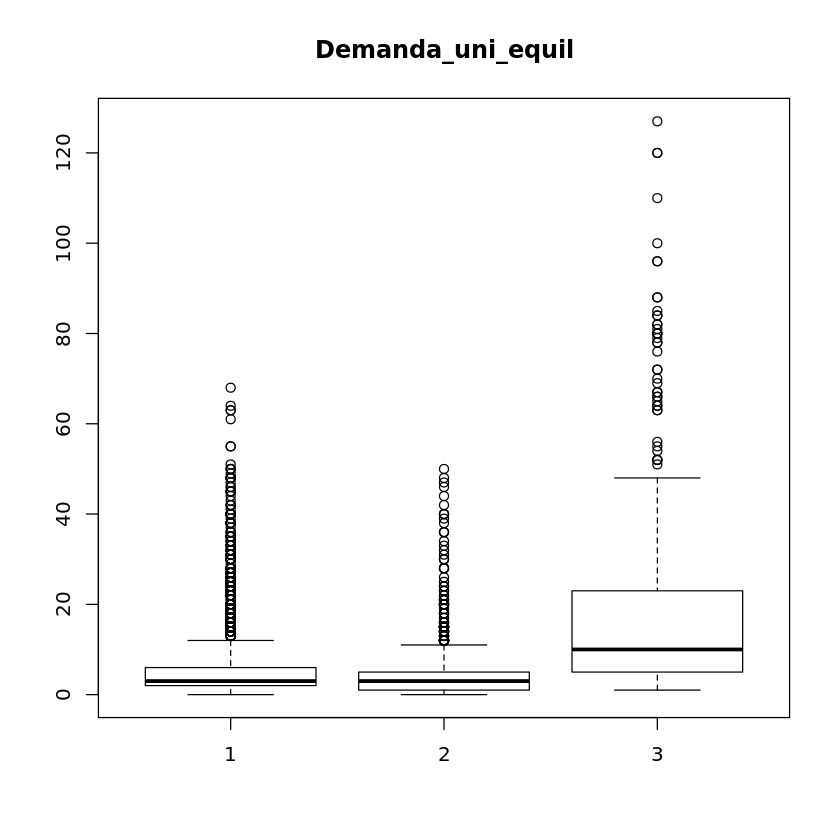

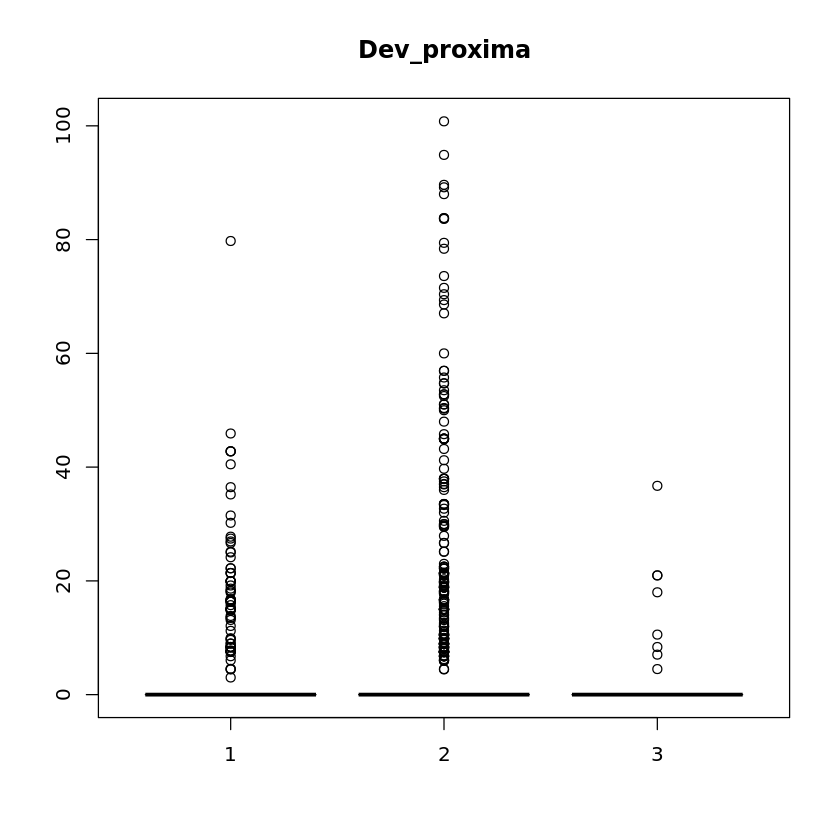

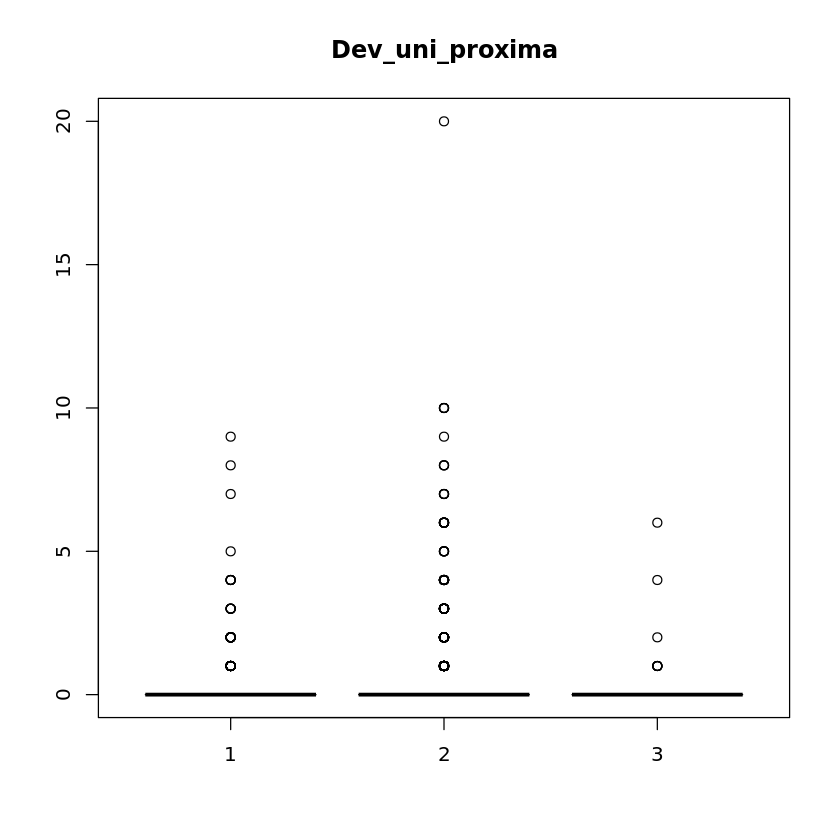

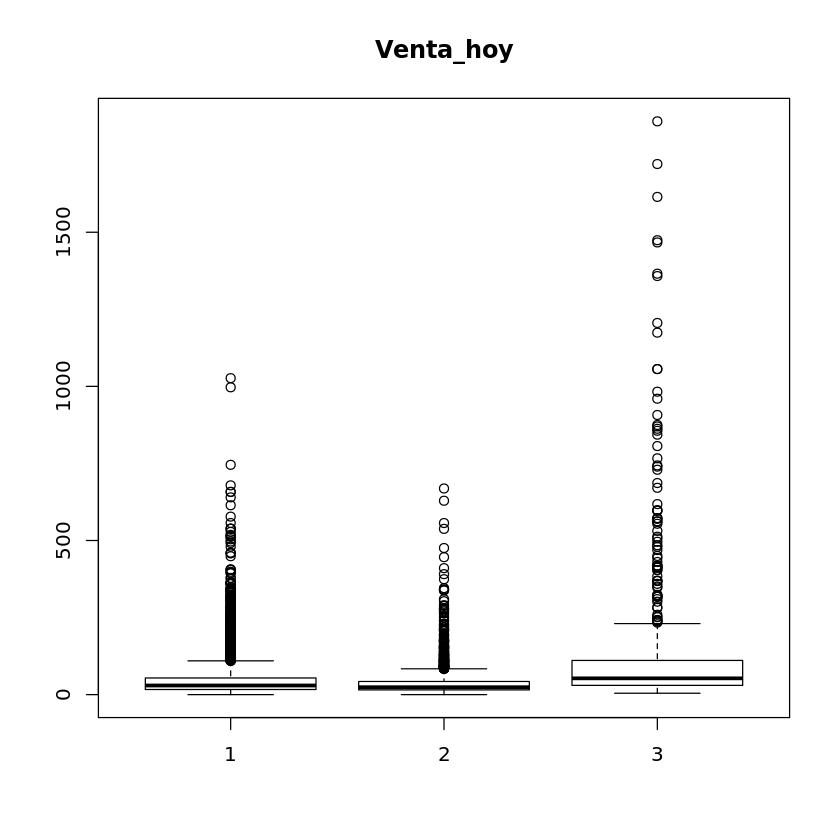

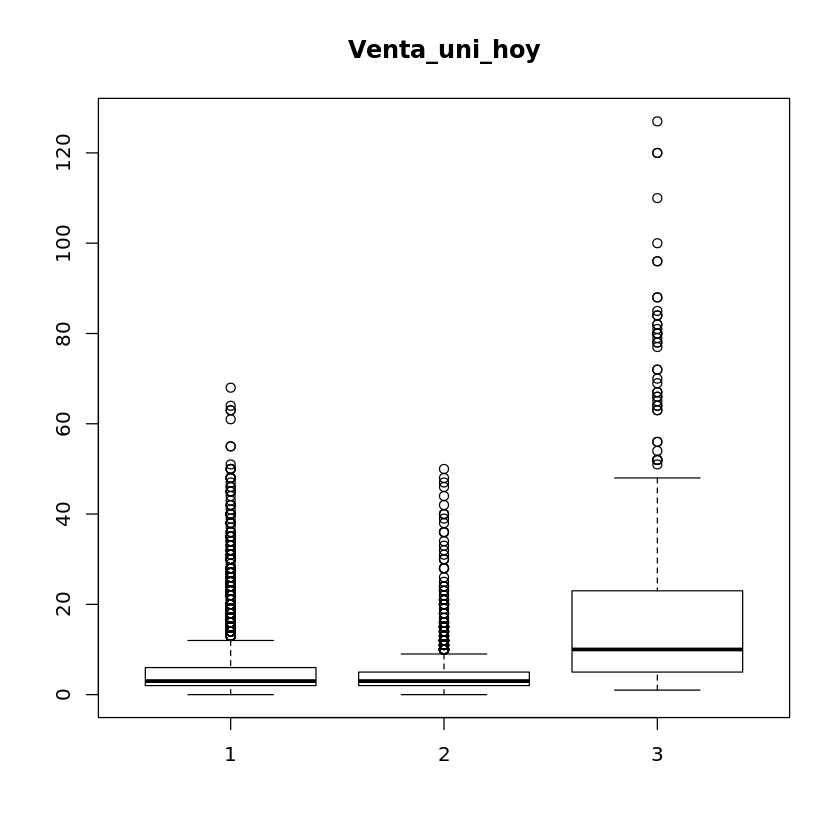

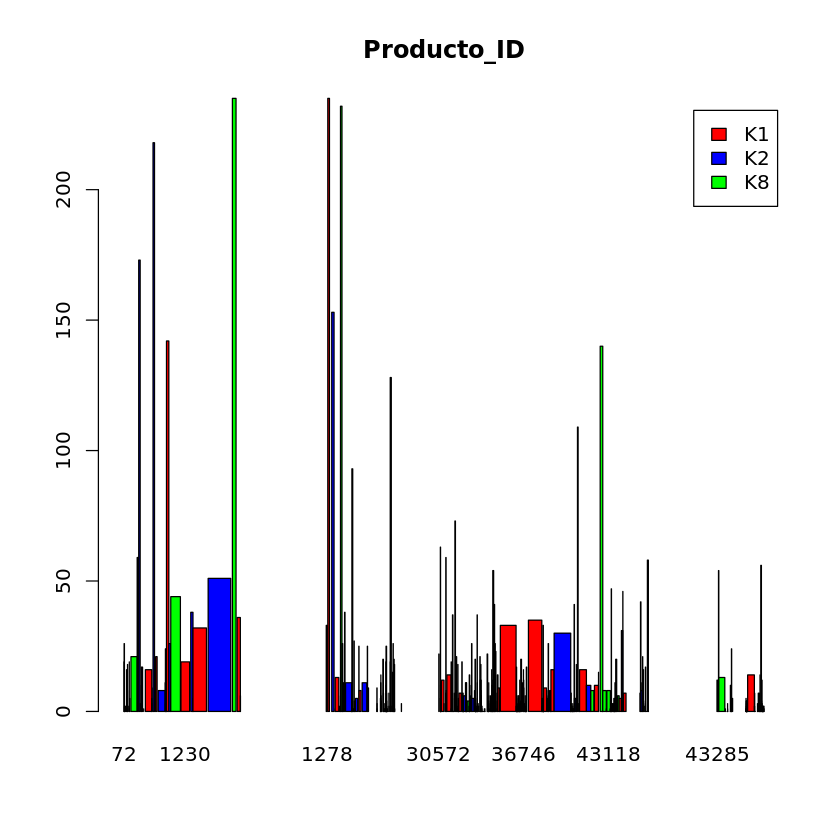

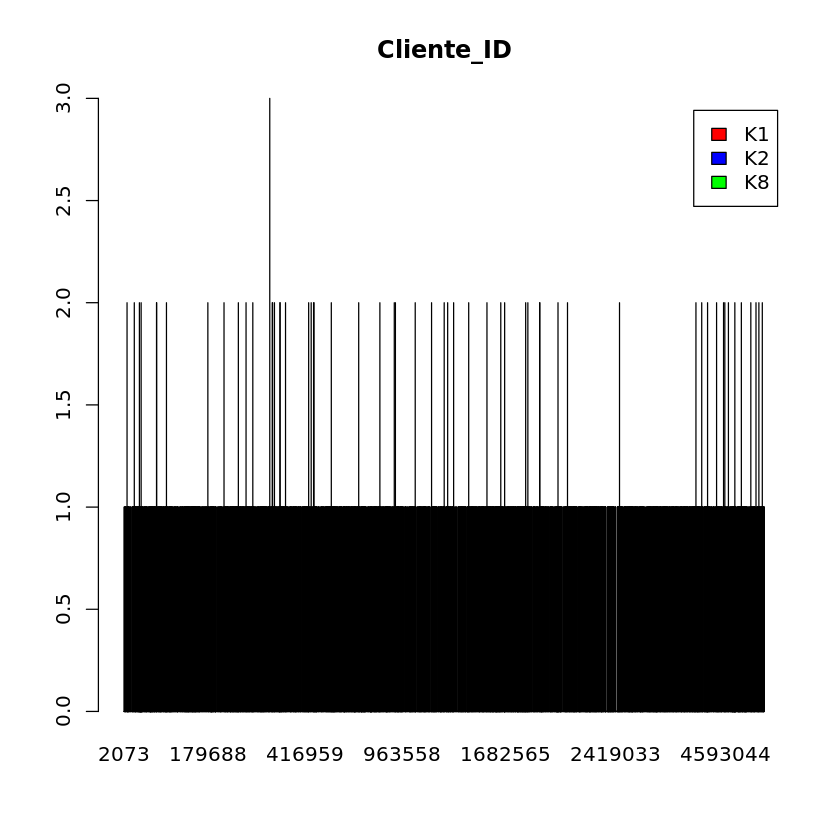

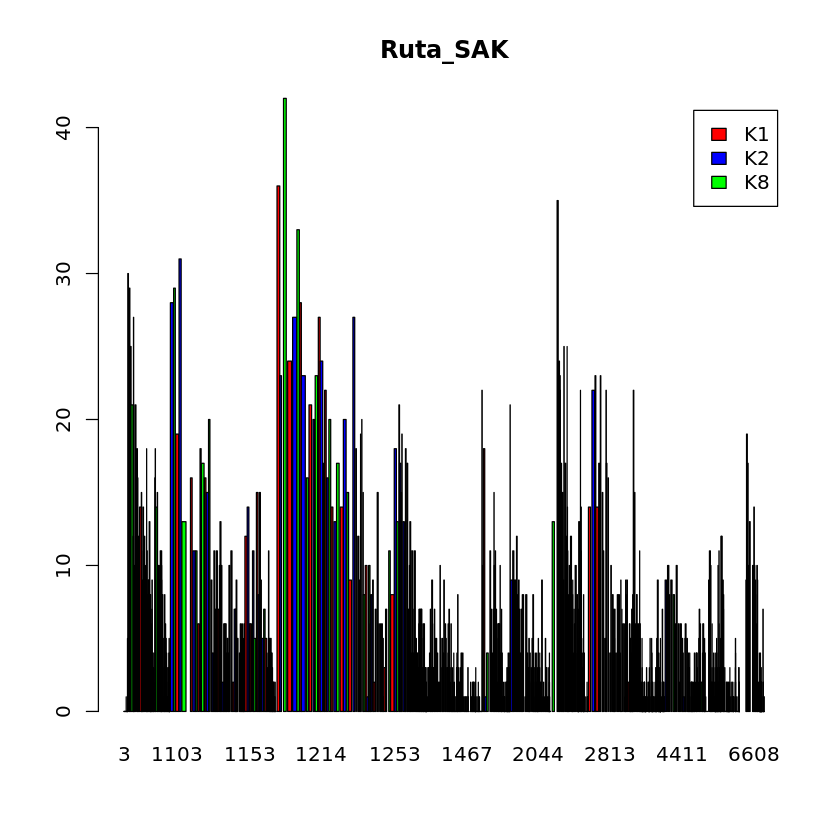

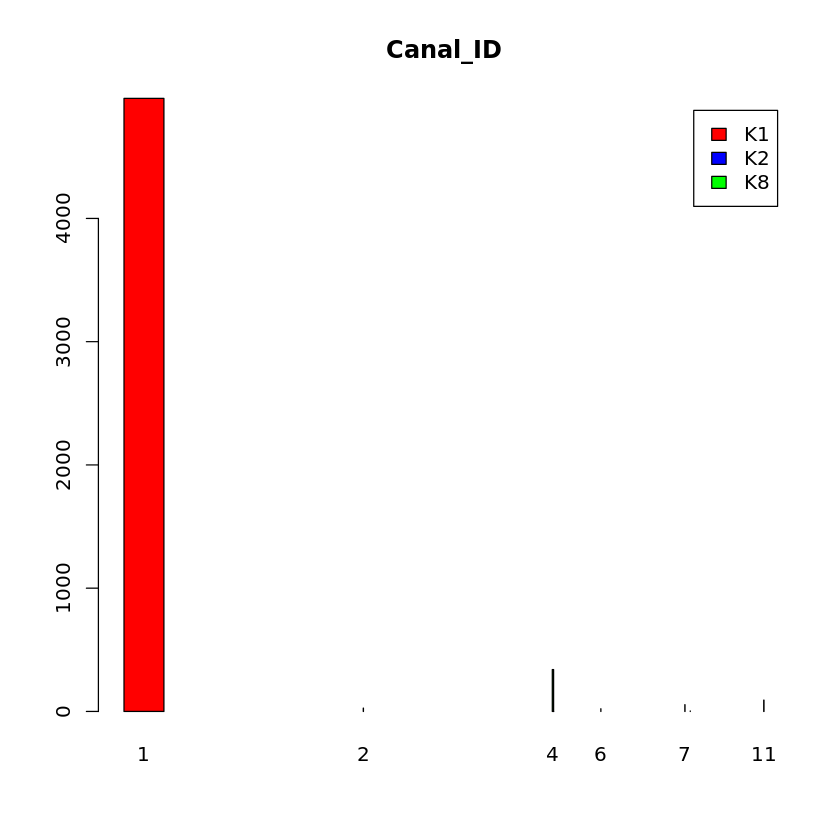

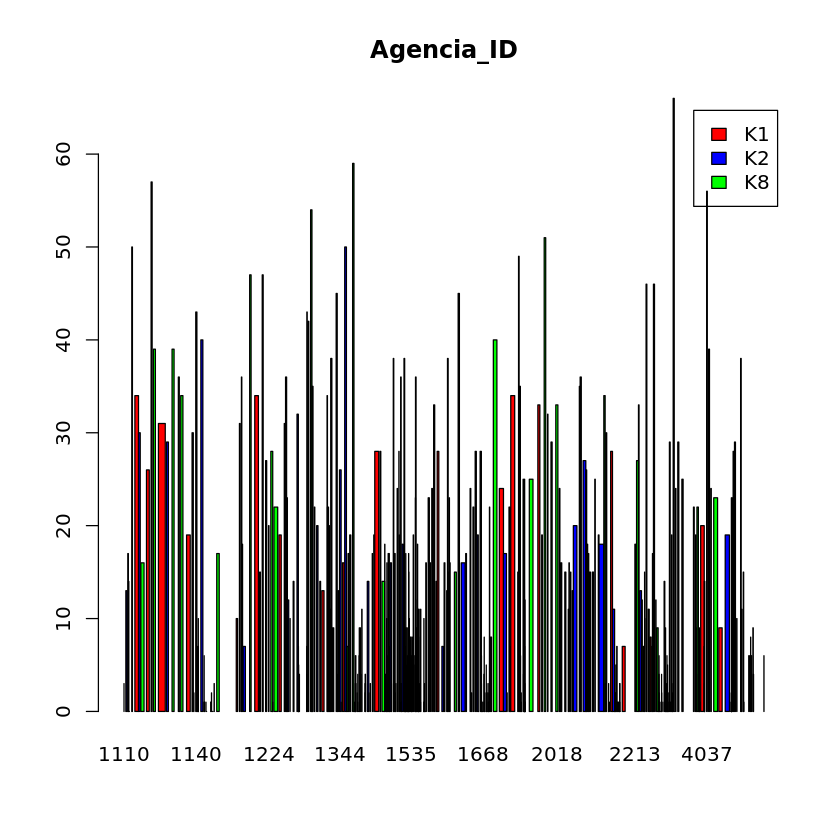

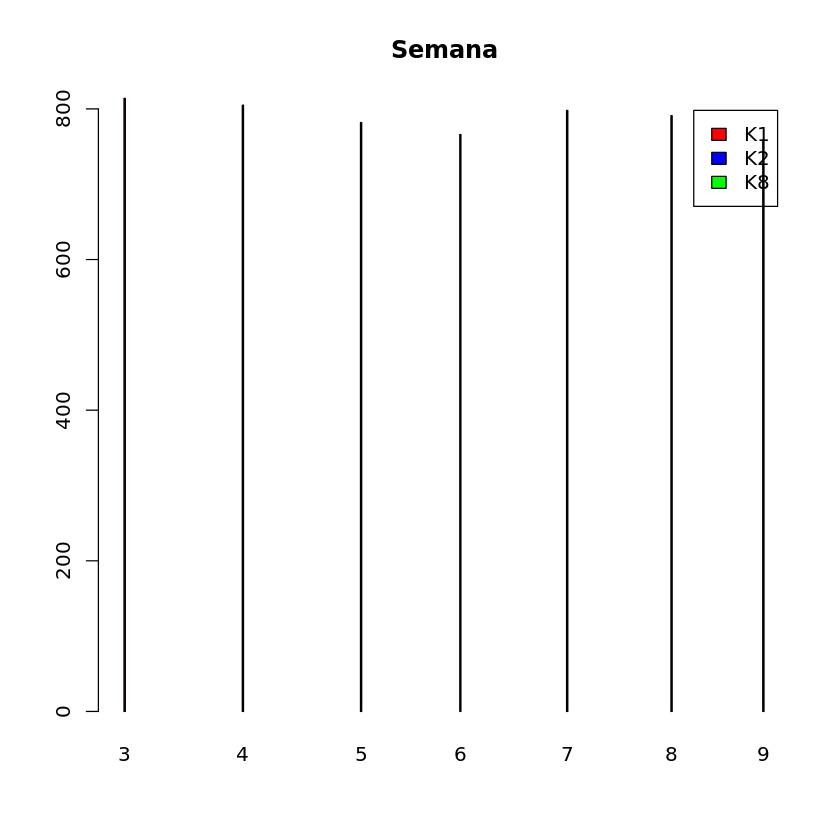

In [156]:
#Boxplots
var <- 'Demanda_uni_equil'
varK1 <- sample10[kclusters == 1, var]
varK2 <- sample10[kclusters == 2, var]
varK8 <- sample10[kclusters == 8, var]
varXcluster <- list(varK1, varK2, varK8)
boxplot(varXcluster, main=var)

var <- 'Dev_proxima'
varK1 <- sample10[kclusters == 1, var]
varK2 <- sample10[kclusters == 2, var]
varK8 <- sample10[kclusters == 8, var]
varXcluster <- list(varK1, varK2, varK8)
boxplot(varXcluster, main=var)

var <- 'Dev_uni_proxima'
varK1 <- sample10[kclusters == 1, var]
varK2 <- sample10[kclusters == 2, var]
varK8 <- sample10[kclusters == 8, var]
varXcluster <- list(varK1, varK2, varK8)
boxplot(varXcluster, main=var)

var <- 'Venta_hoy'
varK1 <- sample10[kclusters == 1, var]
varK2 <- sample10[kclusters == 2, var]
varK8 <- sample10[kclusters == 8, var]
varXcluster <- list(varK1, varK2, varK8)
boxplot(varXcluster, main=var)

var <- 'Venta_uni_hoy'
varK1 <- sample10[kclusters == 1, var]
varK2 <- sample10[kclusters == 2, var]
varK8 <- sample10[kclusters == 8, var]
varXcluster <- list(varK1, varK2, varK8)
boxplot(varXcluster, main=var)

#Barplots
var <- 'Producto_ID'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

var <- 'Cliente_ID'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

var <- 'Ruta_SAK'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

var <- 'Canal_ID'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

var <- 'Agencia_ID'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

var <- 'Semana'
varK1 <- table(sample10[kclusters == 1, var])
varK2 <- table(sample10[kclusters == 2, var])
varK8 <- table(sample10[kclusters == 8, var])
varXcluster <- list(varK1, varK2, varK8)
barplot(varK1,varK2,varK8, main=var, col=c("red","blue","green"), legend=c("K1","K2","K8"))

In [153]:
head(sample10)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
1,3,1111,1,1015,65477,3631,1,16.35,0,0,1
2,3,1111,1,1216,74840,35651,3,22.5,0,0,3
3,3,1111,1,1402,2116885,35651,4,30,0,0,4
4,3,1111,1,1416,2070481,1242,6,45.84,0,0,6
5,3,1112,1,1001,327554,1129,12,211.2,0,0,12
6,3,1112,1,1013,331630,2233,13,259.22,0,0,13
